In [1]:
'''
svm draws a hyper plane in 'n' dimensional space such that it maximizes margin between classification groups

in svm ,the important features are 

     1.gamma
     2.regularization[C]
types-
     1 high gamma- in svm,if draw a hyper plan using nearest points of caterogial groups ,then its is called svm with high gamma
     2 low gamma- in svm,if draw a hyper plan using farest points of caterogial groups ,then its is called svm with low gamma

'''

"\nsvm draws a hyper plane in 'n' dimensional space such that it maximizes margin between classification groups\n\nin svm ,the important features are \n\n     1.gamma\n     2.regularization\ntypes-\n     1 high gamma- in svm,if draw a hyper plan using nearest points of caterogial groups ,then its is called svm with high gamma\n     2 low gamma- in svm,if draw a hyper plan using farest points of caterogial groups ,then its is called svm with low gamma\n\n"

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [8]:
a=load_iris()
df=pd.DataFrame(a.data,columns=a.feature_names)

In [9]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [10]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
df['target']=a.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [13]:
df.target.unique()

array([0, 1, 2])

In [14]:
a.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [15]:
df[df.target==0].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [18]:
df['targetname']=df.target.apply(lambda x:a.target_names[x])

In [19]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,targetname
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [34]:
df0=df[df.target==0]
df1=df[df.target==1]
df2=df[df.target==2]

In [35]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  50 non-null     float64
 1   sepal width (cm)   50 non-null     float64
 2   petal length (cm)  50 non-null     float64
 3   petal width (cm)   50 non-null     float64
 4   target             50 non-null     int32  
 5   targetname         50 non-null     object 
dtypes: float64(4), int32(1), object(1)
memory usage: 2.5+ KB


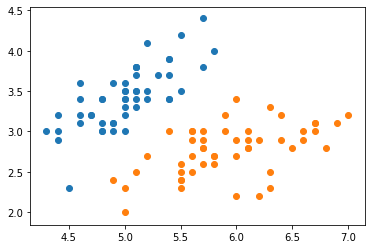

In [36]:
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'])
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'])


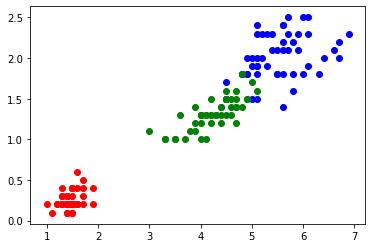

In [37]:
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='blue')
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color='red')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='green')


In [39]:
from sklearn.model_selection import train_test_split

In [43]:
x=df.drop(['target','targetname'],axis='columns')
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [44]:
y=df.target
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [66]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [67]:
xtrain.shape,ytrain.shape

((120, 4), (120,))

In [68]:
from sklearn.svm import SVC

In [69]:
model=SVC()
model.fit(xtrain,ytrain)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [71]:
pred=model.predict(xtest)

In [72]:
model.score(xtest,ytest)

0.9666666666666667

In [73]:
ypredicted=model.predict(xtest)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest,ypredicted)
cm

array([[12,  0,  0],
       [ 0,  9,  1],
       [ 0,  0,  8]], dtype=int64)

Text(69.0, 0.5, 'actual')

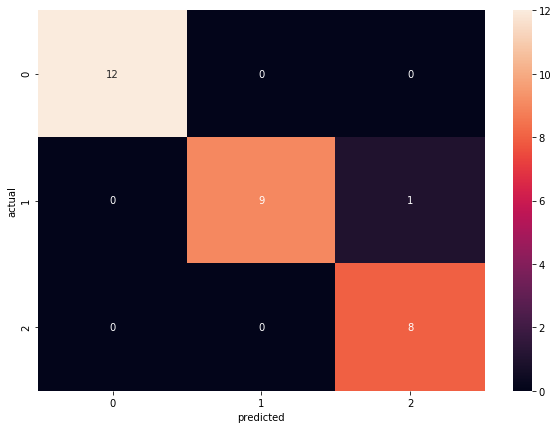

In [74]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('actual')